# 1. Import Libraries

In [10]:
import json
import pandas as pd
from plotly.graph_objs import Scattergeo, Layout
from plotly import offline
import matplotlib.pyplot as plt
import seaborn as sns
from joypy import joyplot

# 2. Import JSON data and load to DataFrame

In [11]:
filename = "earthquakes_worldwide.json"
with open(filename) as f:
    all_earthquake_data = json.load(f)

# Save all dicts from 'features' dict as a variable
all_eq_dicts = all_earthquake_data["features"]

# unpack the information using lists
titles, places, magnitudes, longitudes, latitudes = [], [], [], [], []
for eq_dict in all_eq_dicts:
    title = eq_dict["properties"]["title"]
    place = eq_dict["properties"]["place"]
    magnitude = eq_dict["properties"]["mag"]
    longitude = eq_dict["geometry"]["coordinates"][0]
    latitude = eq_dict["geometry"]["coordinates"][1]
    titles.append(title)
    places.append(place)
    magnitudes.append(magnitude)
    longitudes.append(longitude)
    latitudes.append(latitude)

# create a dict for DataFrame import
df_dict = {"title" : titles, 
           "place" : places,
           "magnitude" : magnitudes,
           "longitude" : longitudes, 
           "latitude" : latitudes}

# create DataFrame
df = pd.DataFrame(data = df_dict)

df.head(10)

,title,place,magnitude,longitude,latitude
0,"M 1.0 - 5km NE of Lake Henshaw, CA","5km NE of Lake Henshaw, CA",0.96,-116.722167,33.272833
1,"M 1.3 - 7km SW of Holtville, CA","7km SW of Holtville, CA",1.33,-115.426833,32.761667
2,"M 1.0 - 3km NNW of The Geysers, CA","3km NNW of The Geysers, CA",0.99,-122.776169,38.802334
3,"M 2.5 - 4 km ESE of La Parguera, Puerto Rico","4 km ESE of La Parguera, Puerto Rico",2.45,-67.012667,17.959000
4,"M 3.4 - 66 km SE of Punta Cana, Dominican Repu...","66 km SE of Punta Cana, Dominican Republic",3.38,-67.923667,18.194667
5,"M 3.1 - 70 km NNE of Cruz Bay, U.S. Virgin Isl...","70 km NNE of Cruz Bay, U.S. Virgin Islands",3.14,-64.449833,18.876333
6,"M 1.4 - 12 km WSW of Susitna, Alaska","12 km WSW of Susitna, Alaska",1.40,-150.728900,61.508000
7,"M 1.1 - 6km WNW of Cobb, CA","6km WNW of Cobb, CA",1.09,-122.788834,38.836834
8,"M 1.3 - 3 km ENE of Central, Alaska","3 km ENE of Central, Alaska",1.30,-144.731700,65.584300
9,"M 2.1 - 10 km ENE of Pāhala, Hawaii","10 km ENE of Pāhala, Hawaii",2.11,-155.381332,19.238167


In [12]:
# Adjust the DataFrame to gain more data insights

def category_sorter(x): 
    if len(x) > 2:
        x = x[2:]
        return " ".join(x)
    else: 
        return "No other issues"

df["region"] = df["place"].str.split(",").str[-1]
df["magnitute_category"] = df["title"].str.split("-").str[0].str[:-1].str.split(" ")
df["other_issues"] = df["magnitute_category"].apply(lambda x: category_sorter(x))
df["magnitute_category"] = df["magnitute_category"].str[:2].str.join(sep = " ")

df.head(10)

,title,place,magnitude,longitude,latitude,region,magnitute_category,other_issues
0,"M 1.0 - 5km NE of Lake Henshaw, CA","5km NE of Lake Henshaw, CA",0.96,-116.722167,33.272833,CA,M 1.0,No other issues
1,"M 1.3 - 7km SW of Holtville, CA","7km SW of Holtville, CA",1.33,-115.426833,32.761667,CA,M 1.3,No other issues
2,"M 1.0 - 3km NNW of The Geysers, CA","3km NNW of The Geysers, CA",0.99,-122.776169,38.802334,CA,M 1.0,No other issues
3,"M 2.5 - 4 km ESE of La Parguera, Puerto Rico","4 km ESE of La Parguera, Puerto Rico",2.45,-67.012667,17.959000,Puerto Rico,M 2.5,No other issues
4,"M 3.4 - 66 km SE of Punta Cana, Dominican Repu...","66 km SE of Punta Cana, Dominican Republic",3.38,-67.923667,18.194667,Dominican Republic,M 3.4,No other issues
5,"M 3.1 - 70 km NNE of Cruz Bay, U.S. Virgin Isl...","70 km NNE of Cruz Bay, U.S. Virgin Islands",3.14,-64.449833,18.876333,U.S. Virgin Islands,M 3.1,No other issues
6,"M 1.4 - 12 km WSW of Susitna, Alaska","12 km WSW of Susitna, Alaska",1.40,-150.728900,61.508000,Alaska,M 1.4,No other issues
7,"M 1.1 - 6km WNW of Cobb, CA","6km WNW of Cobb, CA",1.09,-122.788834,38.836834,CA,M 1.1,No other issues
8,"M 1.3 - 3 km ENE of Central, Alaska","3 km ENE of Central, Alaska",1.30,-144.731700,65.584300,Alaska,M 1.3,No other issues
9,"M 2.1 - 10 km ENE of Pāhala, Hawaii","10 km ENE of Pāhala, Hawaii",2.11,-155.381332,19.238167,Hawaii,M 2.1,No other issues


# 3. Plotting Data 

## 3.1. Plot the earthquake data on the world map

In [19]:
data = [{
    'type': 'scattergeo',
    'lon': longitudes,
    'lat': latitudes,
    'text': titles,
    "textfont" : {'family' : "Arial",
                  'size' : 20},
    "textposition" : "top left",
    'marker': {'size': [4.5 * magnitude for magnitude in magnitudes],
               'color': magnitudes,
               'colorscale': 'Bluered',
               'reversescale': False,
               'colorbar': {'title': 'Magnitude Scale'},
    },
}]

layout = Layout(title = 'Global Earthquakes 13.06.2023 [past 30 Days]<br>Source: https://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php',
                titlefont = {'family' : "Times New Roman",
                             'size' : 25})
fig = {'data': data, 
       'layout': layout}

offline.plot(fig, 
             filename='global_earthquakes.html')

'global_earthquakes.html'

## 3.2. Analyze how the earthquakes are distributed per magnitude category

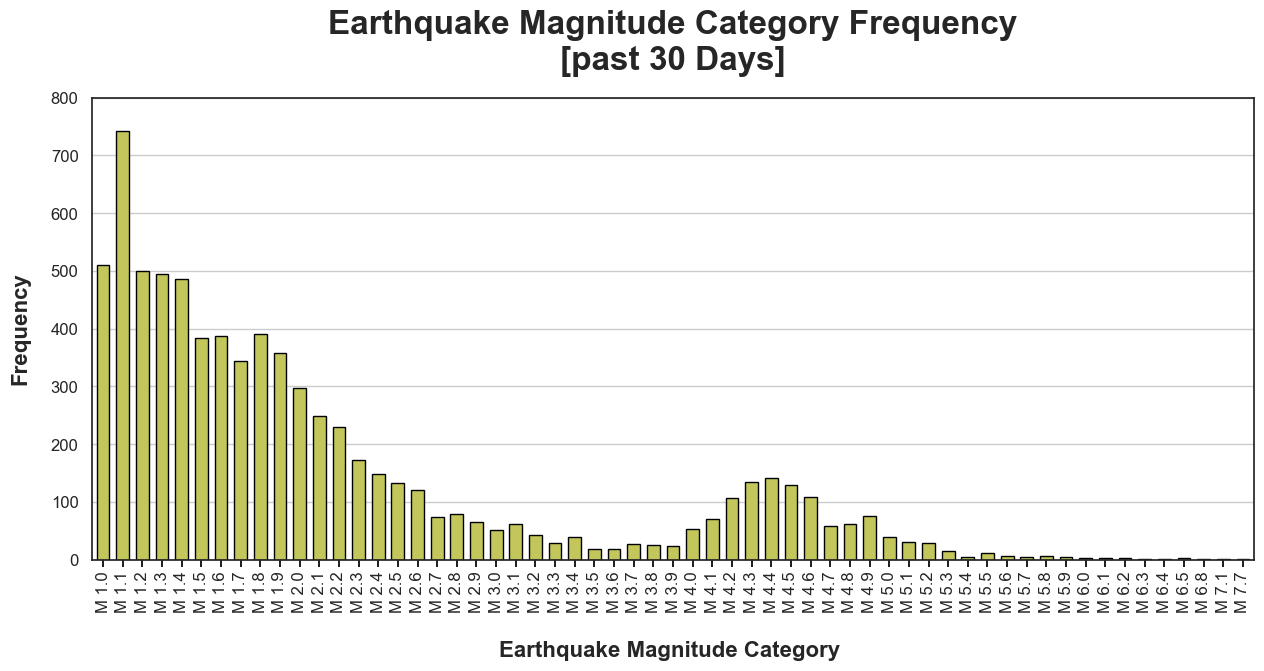

In [14]:
# plot the distribution of the earthquakes based on the magnitude category
magnitude_freq_df = df.groupby("magnitute_category")["title"].count().rename("frequency").to_frame().reset_index()
magnitude_freq_df.plot(kind = "bar", 
                       x = "magnitute_category", 
                       y = "frequency", 
                       width = 0.65,
                       color = "#c2c65b",
                       edgecolor = "black",
                       figsize = (15, 6), 
                       legend = None, 
                       zorder = 2)
plt.title("Earthquake Magnitude Category Frequency\n[past 30 Days]", 
          fontsize = 24, 
          fontweight = "bold", 
          pad = 20)
plt.xlabel("Earthquake Magnitude Category ", 
           fontsize = 16, 
           fontweight = "bold", 
           labelpad = 20)
plt.ylabel('Frequency', 
           fontsize = 16, 
           fontweight = "bold", 
           labelpad = 15)
plt.xticks(rotation = 90, 
           fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim([0, 800])
plt.tick_params(axis = "x", 
                bottom = True, 
                top = False, 
                direction = "out", 
                length = 5, 
                color = "black",
                zorder = 3)
plt.grid(axis = "y", 
         zorder=1)
plt.show()

## 3.3. Analyze the magnitude distribution based on other issues caused by earthquake

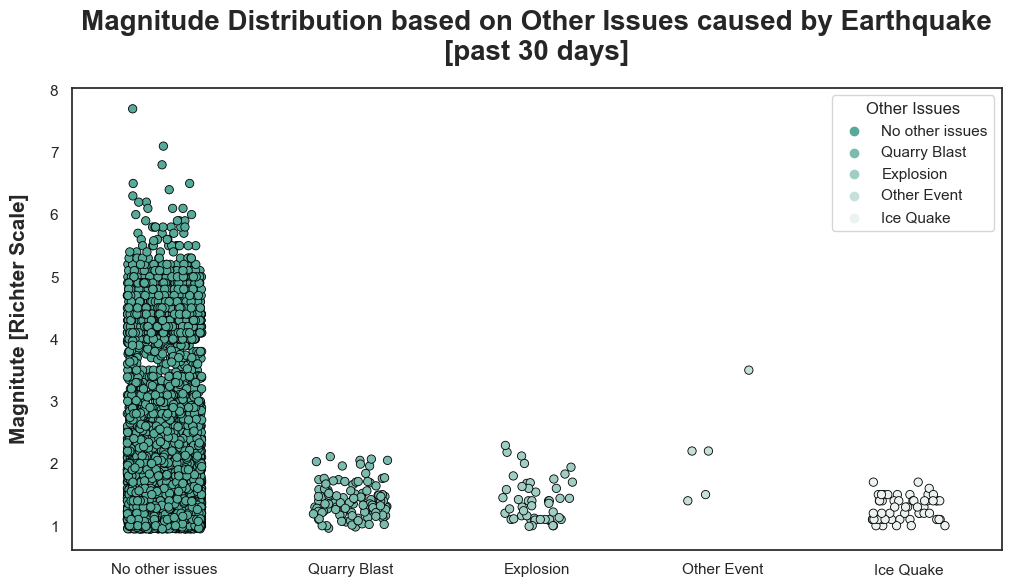

In [15]:
sns.set_theme(style="white")
plt.figure(figsize=(12, 6))
sns.stripplot(data = df, 
              x = "other_issues", 
              y = "magnitude",
              hue = "other_issues",
              palette = "light:#5A9_r",
              jitter = .2, 
              size = 6,
              linewidth = .6,
              edgecolor = "black",
              color = "coral")
plt.title("Magnitude Distribution based on Other Issues caused by Earthquake\n[past 30 days]", fontsize = 20, fontweight = "bold", pad = 20)
plt.xlabel("", fontsize = 15, fontweight = "bold", labelpad = 15)
plt.ylabel("Magnitute [Richter Scale]", fontsize = 15, fontweight = "bold", labelpad = 15)
plt.legend(title = "Other Issues")
plt.show()

## 3.4. What are the top 15 most seismically active regions by frequency and what is the distribution of earthquake magnitudes?

In [16]:
mag_avgs = df.groupby("region").agg({"title" : "count",
                                     "magnitude" : ["min", "mean", "max"]})
mag_avgs.columns = mag_avgs.columns.droplevel()
mag_avgs = mag_avgs.rename(columns = {"count" : "frequency", 
                                      "min" : "min_magnitude", 
                                      "mean" : "avg_magnitude",
                                      "max" : "max_magnitude"})
mag_avgs = mag_avgs.sort_values(by = "frequency", ascending = False).reset_index()
mag_avgs = mag_avgs.iloc[:16].reset_index(drop = True)  # top 15 regions by earthquake frequency in the last 30 days
mag_avgs.sort_values(by = "avg_magnitude", ascending = True)

,region,frequency,min_magnitude,avg_magnitude,max_magnitude
11,Montana,69,0.95,1.352754,2.11
13,Central Alaska,61,1.00,1.431148,3.80
14,Washington,60,0.96,1.435000,3.11
1,CA,1561,0.95,1.466547,5.58
5,Oklahoma,200,0.95,1.482250,2.98
3,Nevada,226,1.00,1.484956,3.70
8,Southern Alaska,89,1.00,1.552809,3.30
0,Alaska,2604,0.96,1.727972,5.70
15,Alaska Peninsula,52,0.95,1.801538,4.50
2,Hawaii,659,0.95,1.987891,3.68


This looks nice. Now let's plot it and make it more visually clear what is the situation.

In [17]:
# find the list of the ascending ordered regions by earthquake frequency registered in last 30 days
ridgeplot_df = df.copy()
ridgeplot_df = ridgeplot_df.loc[ridgeplot_df.region.isin(mag_avgs.region.values)]   # filter the regions in top 15 by earthquake frequency in past 30 days
# to provide a good filter and make the image smoother, convert region to categorical type and order it based on the ascending AVG magnitude per region
ridgeplot_df["region"] = pd.Categorical(ridgeplot_df["region"], 
                                        categories = mag_avgs.sort_values(by = "avg_magnitude", ascending = True).region.values) 
ridgeplot_df = ridgeplot_df[["region", "magnitude"]].sort_values(by = "region",                                                                  
                                                                 ascending = True).reset_index(drop = True)
ridgeplot_df

,region,magnitude
0,Montana,0.99
1,Montana,1.30
2,Montana,1.51
3,Montana,1.26
4,Montana,1.39
...,...,...
6279,southeast of the Loyalty Islands,5.30
6280,southeast of the Loyalty Islands,5.20
6281,southeast of the Loyalty Islands,5.00
6282,southeast of the Loyalty Islands,6.50


<Figure size 640x480 with 0 Axes>

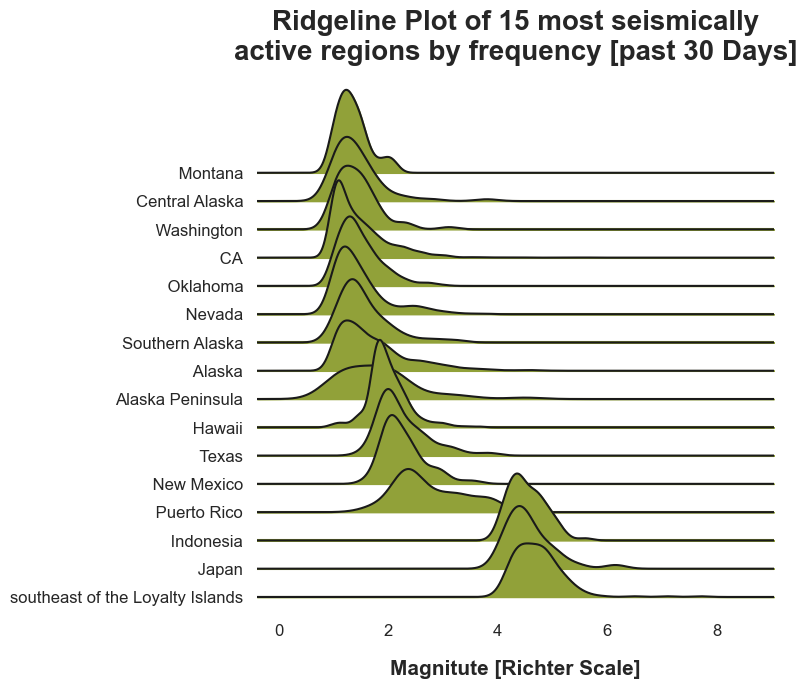

In [18]:
plt.figure()
joyplot(data = ridgeplot_df,
        by = "region",
        figsize = (8, 6),
        color = "#91a139")
plt.title("Ridgeline Plot of 15 most seismically\nactive regions by frequency [past 30 Days]", 
          fontsize = 20, 
          fontweight = "bold", 
          pad = 15)
plt.xlabel("Magnitute [Richter Scale]", 
           fontsize = 15, 
           fontweight = "bold", 
           labelpad = 15)
plt.show()